In [1]:
!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.6 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#imports for music
import librosa
import librosa.display

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

2025-09-06 16:48:21.556373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757177301.798614      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757177301.871848      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train_csv= pd.read_csv("/kaggle/input/audio-speech-sentiment/TRAIN.csv")
train_audio_path= '/kaggle/input/audio-speech-sentiment/TRAIN'
test_audio_path='/kaggle/input/audio-speech-sentiment/TEST'

In [5]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)


features = []
labels = []

for index, row in train_csv.iterrows():
    file_path = os.path.join(train_audio_path, row['Filename'])
    data = extract_features(file_path)
    features.append(data)
    labels.append(row['Class'])


In [6]:
data

array([611.9666    , 144.16055   ,  -6.1898775 ,  27.872957  ,
         5.2731543 , -14.052992  ,   4.7736635 ,   6.259874  ,
        -7.2893705 ,   7.3505316 ,  -6.7599688 ,  -1.0235763 ,
         3.764424  ,  -0.88833016,  -2.2497706 ,   2.7942624 ,
        -1.835728  ,   1.5741001 ,  -4.3322597 ,  -3.1968021 ,
         1.297267  ,  -4.0876865 ,  -3.6318328 ,   1.469079  ,
        -3.6126516 ,  -4.9453034 ,  -1.011876  ,  -7.372404  ,
        -6.313686  ,  -1.5039707 ,  -2.4423532 ,  -3.1980238 ,
        -4.222777  ,  -6.7268486 ,  -1.348261  ,  -1.7835387 ,
        -4.792436  ,  -5.536798  ,  -5.464232  ,  -4.35196   ],
      dtype=float32)

In [7]:
labels[:5]

['Negative', 'Neutral', 'Negative', 'Negative', 'Negative']

In [8]:
X=np.array(features)
le= LabelEncoder()
y= to_categorical(le.fit_transform(labels))
X_train, X_val,y_train, y_val= train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
X_train=X_train.reshape(X_train.shape[0],40,1,1)
X_val=X_val.reshape(X_val.shape[0],40,1,1)

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,1), activation='relu', input_shape=(40,1,1)))
model.add(MaxPooling2D(pool_size=(2,1)))

model.add(Flatten())

#classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

#compiling model
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

#training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3206 - loss: 16.3079 - val_accuracy: 0.4800 - val_loss: 4.8615
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4010 - loss: 8.4212 - val_accuracy: 0.5600 - val_loss: 1.8909
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4869 - loss: 5.6932 - val_accuracy: 0.6400 - val_loss: 2.3864
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4966 - loss: 5.2173 - val_accuracy: 0.6400 - val_loss: 1.0060
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6480 - loss: 1.6786 - val_accuracy: 0.7800 - val_loss: 0.5344
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6712 - loss: 1.3042 - val_accuracy: 0.7600 - val_loss: 0.4639
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6665 - loss: 0.9434 - val_accuracy: 0.7600 - val_loss: 0.5010
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7189 - loss: 0.6659 - val_accuracy: 0.8400 - val_loss: 0.3951

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9021 - loss: 0.2073
Validation Loss: 0.2089
Validation Accuracy: 0.9000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
n\Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.93      0.85        15
     Neutral       1.00      1.00      1.00        20
    Positive       0.92      0.73      0.81        15

    accuracy                           0.90        50
   macro avg       0.90      0.89      0.89        50
weighted avg       0.91      0.90      0.90        50



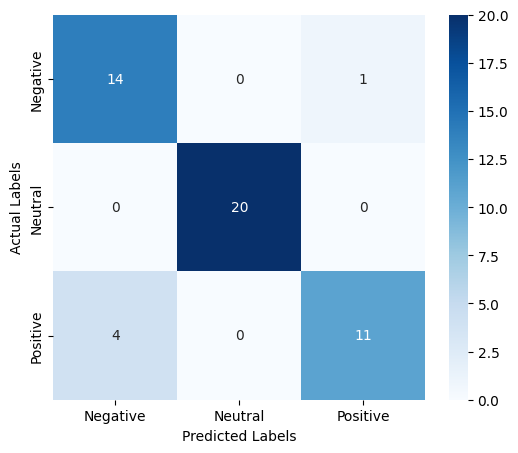

In [16]:
#evaluation of model
loss, accuracy= model.evaluate(X_val,y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

#Predict Classes
y_pred= model.predict(X_val)
y_pred_classes= np.argmax(y_pred, axis=1)
y_true= np.argmax(y_val,axis=1)

#classification report
print("n\Classification Report:")
print(classification_report(y_true,y_pred_classes,target_names=le.classes_))

#confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues',xticklabels= le.classes_, yticklabels= le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [19]:
#prediction
from IPython.display import Audio

#Detection system
def predict_sentiment(audio_path):
    feature = extract_features(audio_path)
    feature = feature.reshape(1, 40, 1, 1)
    prediction = model.predict(feature)
    predicted_label = le.inverse_transform([np.argmax(prediction)])[0]
    return predicted_label


In [20]:
audio_path= '/kaggle/input/audio-speech-sentiment/TEST/112.wav'

display(Audio(audio_path))

predicted_label = predict_sentiment(audio_path)
print(f"Predicted sentiment:{predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted sentiment:Positive


In [21]:
audio_path= '/kaggle/input/audio-speech-sentiment/TEST/115.wav'

display(Audio(audio_path))

predicted_label = predict_sentiment(audio_path)
print(f"Predicted sentiment:{predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted sentiment:Negative


In [22]:
audio_path= '/kaggle/input/audio-speech-sentiment/TEST/136.wav'

display(Audio(audio_path))

predicted_label = predict_sentiment(audio_path)
print(f"Predicted sentiment:{predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted sentiment:Neutral


In [23]:
import pickle

model.save('sentiment_cnn_model.h5')

pickle.dump(le, open('le.pkl', 'wb'))